In [32]:
suppressPackageStartupMessages({
    library(tidyr)
    library(patchwork)
    library(Seurat)
    library(conos)  
    library(dplyr)
    library(ggplot2)
})

## Conos object

In [2]:
conos.5 = readRDS('/home/hsarkar/Projects/ThMYCN/new_conos_app_conos.rds')

In [3]:
anot_order = c(
    'Sympathoblast 1',
    'Chromaffin cells',
    'Sympathoblast 2',
    'Sympathoblast 3',
    'Sympathoblast 4',
    'Sympathoblast 5',
    'B cells',
    'Myeloid cells',
    'T/NK cells',
    'Immature ADRN',
    'Neutrophils',
    'Endothelial cells',
    'mDC',
    'pDC',
    'Mesenchymal cells',
    'Erythrocytes'
)

In [4]:
annot = anot_order[conos.5$clusters$leiden$groups]

In [5]:
names(annot) = names(conos.5$clusters$leiden$groups)

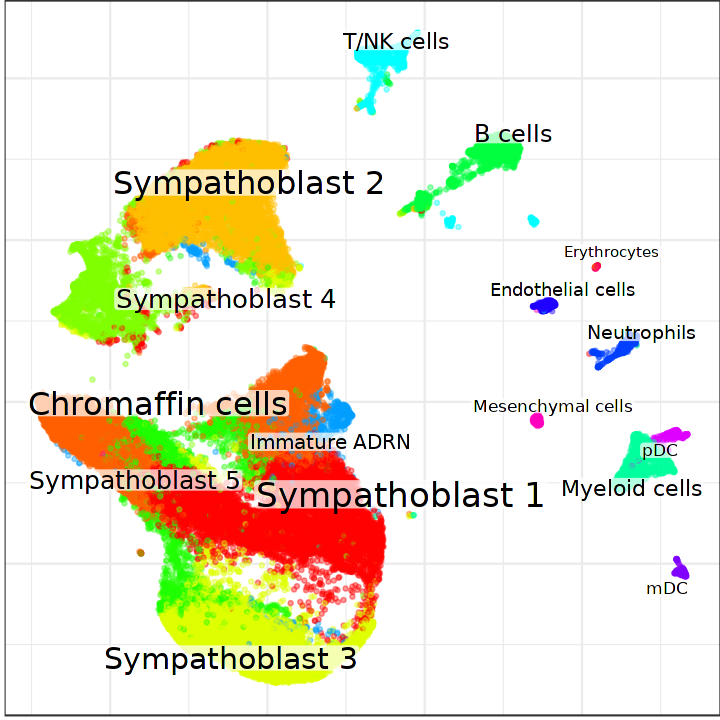

In [6]:
cols = rainbow(16)
names(cols) = anot_order
colsf = function(n) return(cols)

options(repr.plot.height=6, repr.plot.width=6, res=150 ) 
conos.5$plotGraph(groups = annot,palette=colsf)

## Seurat object

In [7]:
seurat.5 = readRDS('/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_5_samples_seurat.rds')

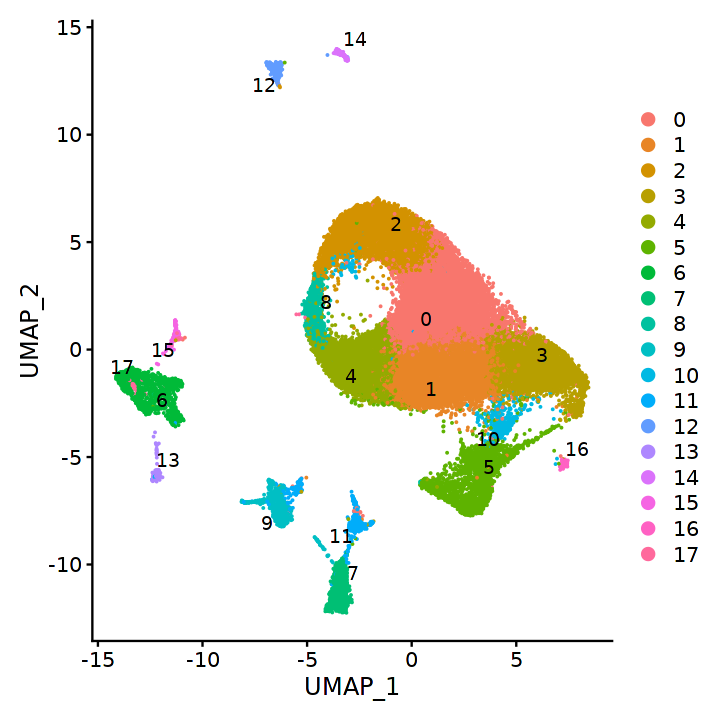

In [9]:
DimPlot(seurat.5, reduction = "umap", label = TRUE, repel = TRUE)

In [14]:
seurat.5$conos_clusters = annot

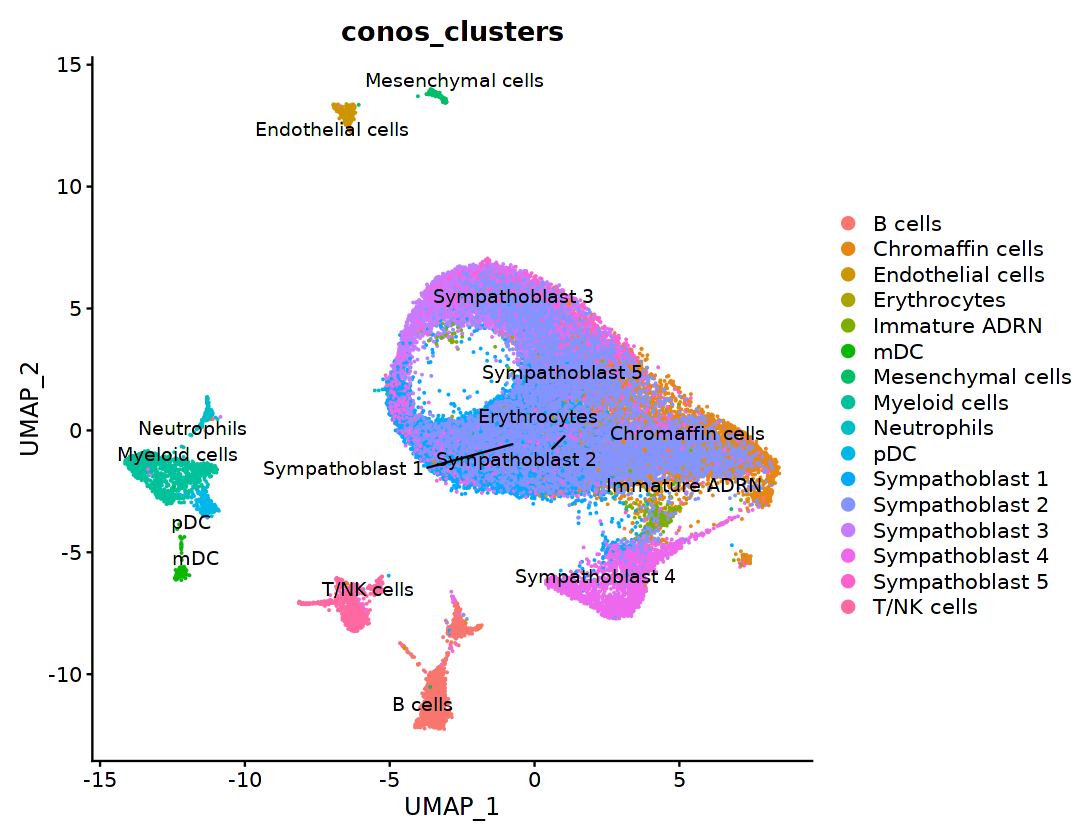

In [15]:
options(repr.plot.height=7, repr.plot.width=9, res=150 ) 
DimPlot(seurat.5, reduction = "umap", group.by = "conos_clusters",label = TRUE, repel = TRUE)

## Finding Seurat markers

In [16]:
seurat.5.markers <- FindAllMarkers(
    seurat.5, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25
)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17



In [18]:
saveRDS(seurat.5.markers, '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_5_samples_seurat_markers.rds')

In [25]:
seurat.5.markers %>%
    group_by(cluster) %>%
    dplyr::slice_max(n = 2, order_by = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.8901782,0.799,0.581,0.000000e+00,0,Ung
0.000000e+00,0.6703801,0.771,0.648,0.000000e+00,0,Mcm3
0.000000e+00,0.6392676,0.967,0.871,0.000000e+00,1,Nefm
0.000000e+00,0.5967862,0.944,0.782,0.000000e+00,1,Cenpa
0.000000e+00,2.4805681,0.965,0.599,0.000000e+00,2,Hist1h1b
0.000000e+00,1.8957830,0.963,0.659,0.000000e+00,2,Top2a
0.000000e+00,1.5445590,0.741,0.630,0.000000e+00,3,Npy
0.000000e+00,1.4286901,0.897,0.733,0.000000e+00,3,Chga
0.000000e+00,1.5818884,0.975,0.705,0.000000e+00,4,Cdc20


In [37]:
seurat.5.markers %>% 
    group_by(cluster) %>%
    top_n(n = 5, wt = avg_log2FC) -> top5

In [38]:
options(repr.plot.height=20, repr.plot.width=20, res=150 )
dot_fig = DoHeatmap(seurat.5, features = top5$gene) + NoLegend()

In [44]:
ggsave(
   filename= '/home/hsarkar/Projects/neuroblastoma_analysis/results/seurat/mouse_nb_5_samples_matrix.pdf',
   plot= dot_fig, 
   height=15,
   width=48
)